In [15]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
import os

In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return(Y, freq)

Index(['5388d14d.wav', 'c685f05f.wav', '36d20ab5.wav', 'd6665734.wav',
       '7352e28f.wav', '8fa096bf.wav', '2f9c5f62.wav', '9cd05a2b.wav',
       'ab465bf9.wav', 'c40632d7.wav',
       ...
       'e43f7db2.wav', '3c66098d.wav', 'ad42e493.wav', '740e5bb7.wav',
       '800b401e.wav', '3c713bcf.wav', '2fc00271.wav', 'b0c06255.wav',
       '71c6451f.wav', '5de123c3.wav'],
      dtype='object', name='fname', length=300)
fname
5388d14d.wav    Saxophone
c685f05f.wav    Saxophone
36d20ab5.wav    Saxophone
d6665734.wav    Saxophone
7352e28f.wav    Saxophone
                  ...    
3c713bcf.wav     Clarinet
2fc00271.wav     Clarinet
b0c06255.wav     Clarinet
71c6451f.wav     Clarinet
5de123c3.wav     Clarinet
Name: label, Length: 300, dtype: object
['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass', 'Flute', 'Hi-hat', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle']


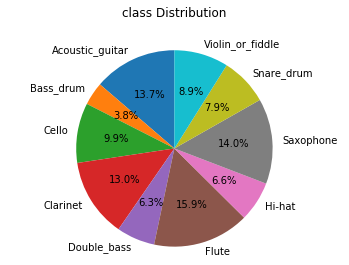

In [6]:
df = pd.read_csv('instruments.csv')
df.set_index('fname', inplace=True)
print(df.index)
print(df.label)
for f in df.index:
    rate, signal = wavfile.read('wavfiles/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.label))
print(classes)
class_dist = df.groupby(['label'])['length'].mean()

fig, ax = plt.subplots()
ax.set_title('class Distribution', y=1.08)
ax.pie(class_dist, labels = class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [4]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes:
    print(c)
    wav_file = df[df.label == c].iloc[0,0]
    print(wav_file)
    signal, rate = librosa.load('wavfiles/'+wav_file, sr=44100)
    mask = envelope(signal, rate, 0.0005)
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)

    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[c] = bank
    mel = mfcc(signal[:rate], rate, numcep = 13, nfilt=26, nfft = 1103).T
    mfccs[c] = mel

Acoustic_guitar
17f82c05.wav
Bass_drum
52e54bdd.wav
Cello
e2d993ec.wav
Clarinet
a64a3740.wav
Double_bass
e6597186.wav
Flute
18865530.wav
Hi-hat
078f7ac0.wav
Saxophone
5388d14d.wav
Snare_drum
229be2be.wav
Violin_or_fiddle
d6144e01.wav


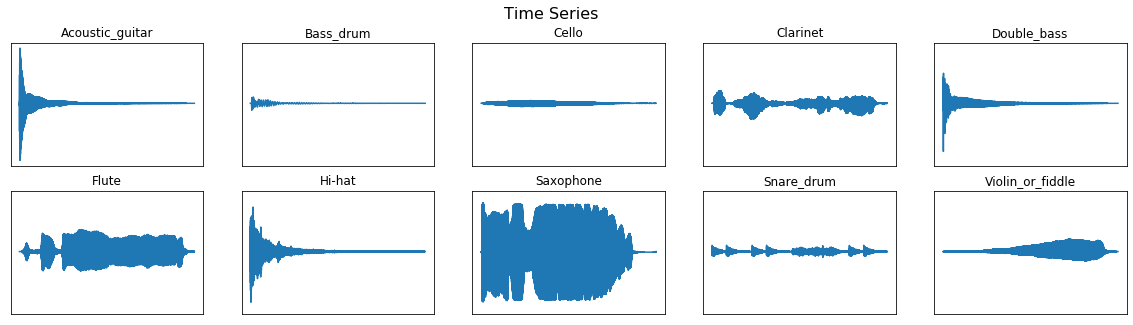

In [5]:
plot_signals(signals)
plt.show()

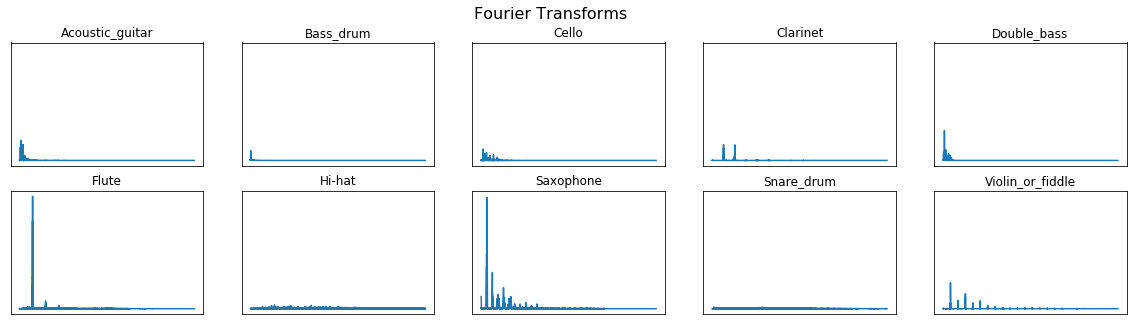

In [6]:
plot_fft(fft)
plt.show()

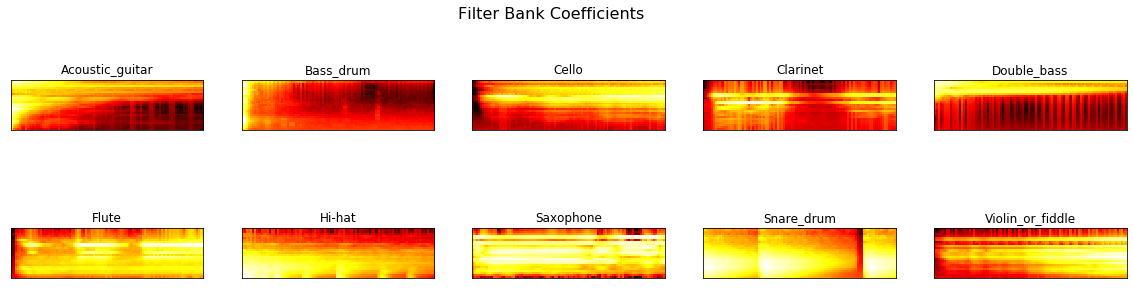

In [7]:
plot_fbank(fbank)
plt.show()

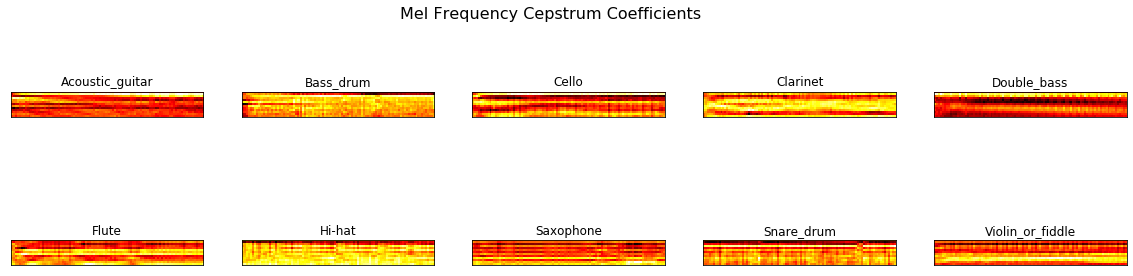

In [8]:
plot_mfccs(mfccs)
plt.show()

# ============================================================= 

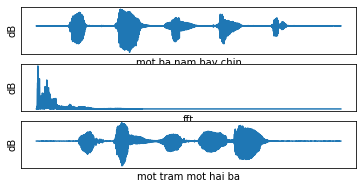

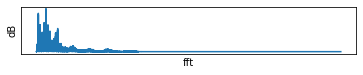

In [3]:
signal, rate = librosa.load('VIVOSDEV12_248.wav', sr=44100)
mask = envelope(signal, rate, 0.0005)
signal = signal[mask]
fft = calc_fft(signal, rate)
bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
mel = mfcc(signal[:rate], rate, numcep = 13, nfilt=26, nfft = 1103).T
data = list(fft)
Y, freq = data[0], data[1]

signal1, rate1 = librosa.load('VIVOSDEV06_247.wav', sr=44100)
mask1 = envelope(signal1, rate1, 0.0005)
signal1 = signal1[mask1]
fft1 = calc_fft(signal1, rate1)
bank1 = logfbank(signal1[:rate], rate, nfilt=26, nfft=1103).T
mel1 = mfcc(signal1[:rate1], rate1, numcep = 13, nfilt=26, nfft = 1103).T
data1 = list(fft1)
Y1, freq1 = data1[0], data1[1]


plt.subplot(4,1,1)
plt.plot(signal)
plt.xticks([])
plt.yticks([])
plt.ylabel('dB')
plt.xlabel('mot ba nam bay chin')

plt.subplot(4,1,2)
plt.plot(freq, Y)
plt.xticks([])
plt.yticks([])
plt.ylabel('dB')
plt.xlabel('fft')

plt.subplot(4,1,3)
plt.plot(signal1)
plt.xticks([])
plt.yticks([])
plt.ylabel('dB')
plt.xlabel('mot tram mot hai ba')
plt.show()

plt.subplot(4,1,4)
plt.plot(freq1, Y1)
plt.xticks([])
plt.yticks([])
plt.ylabel('dB')
plt.xlabel('fft')
plt.show()

(74000,)
bat dau khac 0 tu day:  6729
(57351,)
ket thuc 4018
tgian la:  6.151199340820312e-05
40


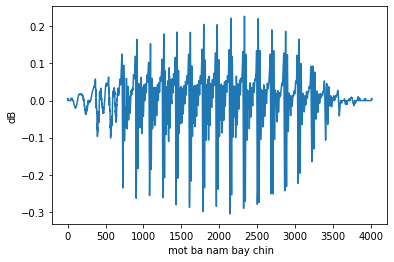

In [77]:
#ko dc sua
import time
wave, rate = librosa.load('VIVOSDEV12_248.wav', sr=16000) # 1 3 5 7 9 
print(wave.shape)
mask2 = envelope(wave, 16000, 0.0005)
wave = wave[mask2]

for i in range(wave.shape[0]):
    if abs(wave[i]) < 0.004:
        wave[i] = 0

# bo doan bang 0 dau
for i in range(wave.shape[0]): 
    if abs(wave[i]) != 0:
        print('bat dau khac 0 tu day: ', i)
        wave = wave[i:wave.shape[0]]
        break
print(wave.shape)

wave = list(wave)
def subfinder(mylist, pattern):
    matches = []
    m = []
    for i in range(len(mylist)):
        start_time = time.time()
        if sum(mylist[i:i+100]) == 0:
            print('ket thuc',i)
            end_time = time.time() - start_time
            mylist = mylist[0:i]
            print('tgian la: ',end_time)
            break
    return mylist

pattern = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
wave = subfinder(wave, pattern)
print(len(pattern))
plt.plot(wave)
plt.ylabel('dB')
plt.xlabel(' mot ba nam bay chin')
plt.show()

out = np.array(wave, dtype=np.float32)
librosa.output.write_wav('voice.wav', out, sr=16000)


signal_shape:  64080
i la 7408
j la 9494
i la 17320
j la 21045
i la 28735
j la 30735
i la 38653
j la 40653
i la 49978
j la 52028
dau:  [6408, 16320]
cuoi:  [10494, 22045]


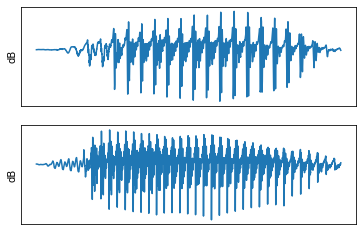

In [14]:
import os
wave, rate2 = librosa.load('so.wav', sr=16000) # 1 3 5 7 9 
mask2 = envelope(wave, 16000, 0.0005)
wave = wave[mask2]
wave_shape = wave.shape[0]
signal = wave.copy()
for i in range(wave_shape):
    if abs(signal[i]) < 0.05:
        signal[i] = 0
librosa.output.write_wav('data1/so_clean.wav', signal, sr=16000)

dau = []
cuoi = []
m = -1
m_dau = 0
print('signal_shape: ', wave_shape)

while(m != m_dau):
    m_dau = m
    for i in range(m+1, len(signal)):
        if sum(abs(signal[i:i+100])) > 10:
            for j in range(i+2000, len(signal)):
                if sum(signal[j:j+100]) == 0:
                    m = j + 1000
                    print('i la', i)
                    print('j la', j)
                    if sum(abs(signal[i-1000:j+2000])) > 100 and (j+1000-i+1000) > 1000:
                        dau.append(i-1500)
                        cuoi.append(j+2000)
                    break
            break
print('dau: ', dau)
print('cuoi: ', cuoi)


a = {}
    
for k in range(len(dau)):
    a[k] = wave[dau[k]:cuoi[k]]
    
    

for i in range(len(dau)):
    plt.subplot(len(dau),1,i+1)
    plt.plot(a[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('dB')

for n in a:
    out = np.array(n, dtype=np.float32)
    
for i in range(len(dau)):
    librosa.output.write_wav('data1/'+str(i)+'.wav', a[i], sr=16000)

signal_shape:  64080
dau:  [5457, 15165, 25686, 36708, 48385]
cuoi:  [11587, 24665, 34900, 44112, 53642]


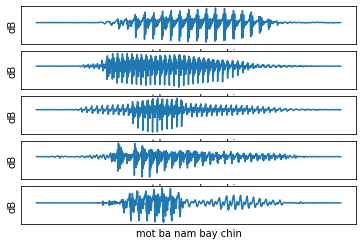

In [10]:
#cat thanh cong
wave, rate2 = librosa.load('VIVOSDEV12_248.wav', sr=16000) # 1 3 5 7 9 
mask2 = envelope(wave, 16000, 0.0005)
wave = wave[mask2]
wave_shape = wave.shape[0]
signal = wave.copy()
for i in range(wave_shape):
    if abs(signal[i]) < 0.004:
        signal[i] = 0

dau = []
cuoi = []
m = -1
m_dau = 0
print('signal_shape: ', wave_shape)

while(m != m_dau):
    m_dau = m
    for i in range(m+1, len(signal)):
        if sum(abs(signal[i:i+10])) > 0.3:
            dau.append(i-1500)
            for j in range(i+2000, len(signal)):
                if sum(signal[j:j+50]) == 0:
                    m = j + 1000
                    cuoi.append(j+1000)
                    break
            break


print('dau: ', dau)
print('cuoi: ', cuoi)
a = {}

for i in range(len(dau)):
    a[i] = wave[dau[i]:cuoi[i]]
    

for i in range(len(dau)):
    plt.subplot(len(dau),1,i+1)
    plt.plot(a[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('dB')
    plt.xlabel('mot ba nam bay chin')

for n in a:
    out = np.array(n, dtype=np.float32)

for i in range(len(dau)):
    librosa.output.write_wav('data1/'+str(i)+'.wav', a[i], sr=16000)

In [94]:
a = [0, 1, 2 , -1, 1, -2, 0, 0, 2]
a = np.array(a, dtype=np.float32)
for i in range(len(a)):
    print(sum(abs(a[i:i+1000])))
a = []

9.0
9.0
8.0
6.0
5.0
4.0
2.0
2.0
2.0


AttributeError: 'list' object has no attribute 'dtype'

In [10]:
def subfinder(mylist, pattern):
    matches = []
    m = []
    for i in range(len(mylist)):
        if mylist[i:i+len(pattern)] == pattern:
            print(i)
            mylist = mylist[0:i]
    return mylist

mylist = [1, 0, 3, 0, 0, 4, 5, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,7]
pattern = [0, 0, 0, 0, 0]
print(subfinder(mylist, pattern))

7
[1, 0, 3, 0, 0, 4, 5]


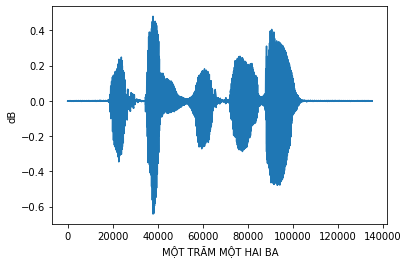

In [11]:
signal, rate = librosa.load('xinchao.wav', sr=44100)
mask = envelope(signal1, rate, 0.0005)
signal = signal1[mask]

plt.plot(signal)
plt.ylabel('dB')
plt.xlabel('MỘT TRĂM MỘT HAI BA')
plt.show()
wave = []

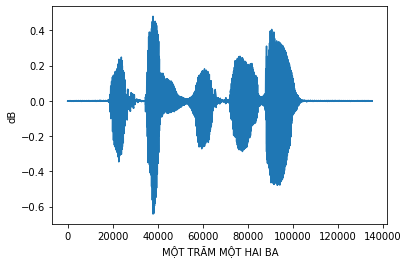

In [43]:
signal, rate = librosa.load('xinchao.wav', sr=44100)
mask = envelope(signal1, rate, 0.0005)
signal = signal1[mask]

plt.plot(signal)
plt.ylabel('dB')
plt.xlabel('MỘT TRĂM MỘT HAI BA')
plt.show()
wave = []

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.xticks([])
    plt.yticks([])

 20%|██        | 2/10 [00:00<00:01,  5.99it/s]

{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32)}
{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32)}


 40%|████      | 4/10 [00:00<00:00,  6.33it/s]

{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R005.wav': array([1.27793066e-06, 1.12944999e-05, 1.02692575e-05, ...,
       1.32800417e-03, 7.85806740e-04, 0.00000000e+00], dtype=float32)}
{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R005.wav': array([1.27793066e-06, 1.12944999e-05, 1.02692575e-05, ...,
       1.32800417e-03, 7.85806740e-04, 0.00000000e+00], dtype=float32), 'VIVOSSPK02_R001.wav': array([-8.3265077e-06,  5.7012558e-06,  1.553

 60%|██████    | 6/10 [00:00<00:00,  6.97it/s]

{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R005.wav': array([1.27793066e-06, 1.12944999e-05, 1.02692575e-05, ...,
       1.32800417e-03, 7.85806740e-04, 0.00000000e+00], dtype=float32), 'VIVOSSPK02_R001.wav': array([-8.3265077e-06,  5.7012558e-06,  1.5533888e-05, ...,
       -6.0263577e-05, -9.0620255e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R003.wav': array([6.9314929e-06, 2.1359110e-05, 2.7332399e-05, ..., 1.2406697e-03,
       9.4570214e-04, 4.8998027e-04], dtype=float32)}
{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-

 80%|████████  | 8/10 [00:01<00:00,  7.50it/s]

{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R005.wav': array([1.27793066e-06, 1.12944999e-05, 1.02692575e-05, ...,
       1.32800417e-03, 7.85806740e-04, 0.00000000e+00], dtype=float32), 'VIVOSSPK02_R001.wav': array([-8.3265077e-06,  5.7012558e-06,  1.5533888e-05, ...,
       -6.0263577e-05, -9.0620255e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R003.wav': array([6.9314929e-06, 2.1359110e-05, 2.7332399e-05, ..., 1.2406697e-03,
       9.4570214e-04, 4.8998027e-04], dtype=float32), 'VIVOSSPK02_R010.wav': array([-3.6573471e-07,  3.1832403e-06,  1.7788871e-05, ...,
        1.7132552e-03,  1.1862762e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R004.wav': array([7.9310967e-06, 8.5911888e-06, 1.3062235e-05, 

100%|██████████| 10/10 [00:01<00:00,  7.51it/s]

{'VIVOSSPK02_R006.wav': array([-4.7456118e-07,  6.3250632e-06,  2.0859648e-05, ...,
        3.2619864e-03,  1.8512300e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R007.wav': array([-1.8287549e-06,  1.3179343e-06,  1.7530745e-05, ...,
        2.0542931e-04,  9.1515554e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R005.wav': array([1.27793066e-06, 1.12944999e-05, 1.02692575e-05, ...,
       1.32800417e-03, 7.85806740e-04, 0.00000000e+00], dtype=float32), 'VIVOSSPK02_R001.wav': array([-8.3265077e-06,  5.7012558e-06,  1.5533888e-05, ...,
       -6.0263577e-05, -9.0620255e-05,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R003.wav': array([6.9314929e-06, 2.1359110e-05, 2.7332399e-05, ..., 1.2406697e-03,
       9.4570214e-04, 4.8998027e-04], dtype=float32), 'VIVOSSPK02_R010.wav': array([-3.6573471e-07,  3.1832403e-06,  1.7788871e-05, ...,
        1.7132552e-03,  1.1862762e-03,  0.0000000e+00], dtype=float32), 'VIVOSSPK02_R004.wav': array([7.9310967e-06, 8.5911888e-06, 1.3062235e-05, 

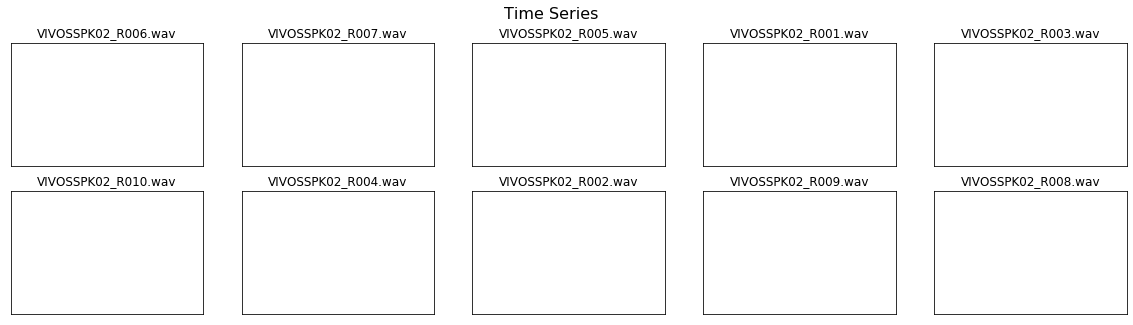

In [49]:
# def plot_signals(signals):
#     fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
#                              sharey=True, figsize=(20,5))
#     fig.suptitle('Time Series', size=16)
#     i = 0
#     for x in range(2):
#         for y in range(5):
#             axes[x,y].set_title(list(signals.keys())[i])
#             axes[x,y].plot(list(signals.values())[i])
#             axes[x,y].get_xaxis().set_visible(False)
#             axes[x,y].get_yaxis().set_visible(False)
#             i += 1


# plt.subplots()
# fig.suptitle('Time Series', size=16)
# set_title('VIVOSDEV12_248.wav')
#             axes[x,y].plot(list(signals.values())[i])
#             axes[x,y].get_xaxis().set_visible(False)
#             axes[x,y].get_yaxis().set_visible(False)
#             i += 1
#______________________________________________________________________
# signals = {}
# fft = {}
# fbank = {}
# mfccs = {}

# for c in classes:
#     wav_file = df[df.label == c].iloc[0,0]
#     signal, rate = librosa.load('wavfiles/'+wav_file, sr=44100)
#     mask = envelope(signal, rate, 0.0005)
#     signal = signal[mask]
#     signals[c] = signal
#     fft[c] = calc_fft(signal, rate)

#     bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
#     fbank[c] = bank
#     mel = mfcc(signal[:rate], rate, numcep = 13, nfilt=26, nfft = 1103).T
#     mfccs[c] = mel
#--------------------------------------------------------------------------


audio_dir = 'VIVOSSPK02'        
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
fig.suptitle('Time Series', size=16)
i = 0
signals = {}
fns = {}
for fn in tqdm(os.listdir(audio_dir)):
    signal, rate = librosa.load('VIVOSSPK02/'+fn, sr=44100)
    mask = envelope(signal, rate, 0.0005)
    signal = signal[mask]
    fns[fn] = fn
    signals[fn] = signal
    print(signals)
for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fns.keys())[i])
            axes[x,y].plot(list(signals.keys())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

plt.ylabel('dB')
plt.xlabel('second')
plt.show()